**Author:** *Johannes Peter Knoll*

# Introduction

This Notebook is supposed to demonstrate the results of all calculations that are made in
the main.py file

In [5]:
# The autoreload extension allows you to tweak the code in the imported modules
# and rerun cells to reflect the changes.
%load_ext autoreload
%autoreload 2

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# Parameters and Files

In [16]:
import main

import random

In [7]:
DATA_DIRECTORY = main.DATA_DIRECTORY

TEMPORARY_PICKLE_DIRECTORY_NAME = main.TEMPORARY_PICKLE_DIRECTORY_NAME
TEMPORARY_FIGURE_DIRECTORY_PATH = main.TEMPORARY_FIGURE_DIRECTORY_PATH

PREPARATION_DIRECTORY = main.PREPARATION_DIRECTORY

CHECK_ECG_DATA_THRESHOLDS_PATH = main.CHECK_ECG_DATA_THRESHOLDS_PATH
VALID_ECG_REGIONS_PATH = main.VALID_ECG_REGIONS_PATH
CERTAIN_RPEAKS_PATH = main.CERTAIN_RPEAKS_PATH
UNCERTAIN_PRIMARY_RPEAKS_PATH = main.UNCERTAIN_PRIMARY_RPEAKS_PATH
UNCERTAIN_SECONDARY_RPEAKS_PATH = main.UNCERTAIN_SECONDARY_RPEAKS_PATH

CALIBRATION_DATA_PATH = main.CALIBRATION_DATA_PATH

In [8]:
parameters = main.parameters

# Preparation

## Calculating Valid ECG Regions:

Go ahead and change the file_name and xlim to see different data in different intervals!  
Plotting Time: up to 35s (it's a lot of data)

ATTENTION: Valid ECG Regions must have been compiled first (see main.py - PREPARATION SECTION)  

(Valid / Total) Regions Ratio: 41.230000 %


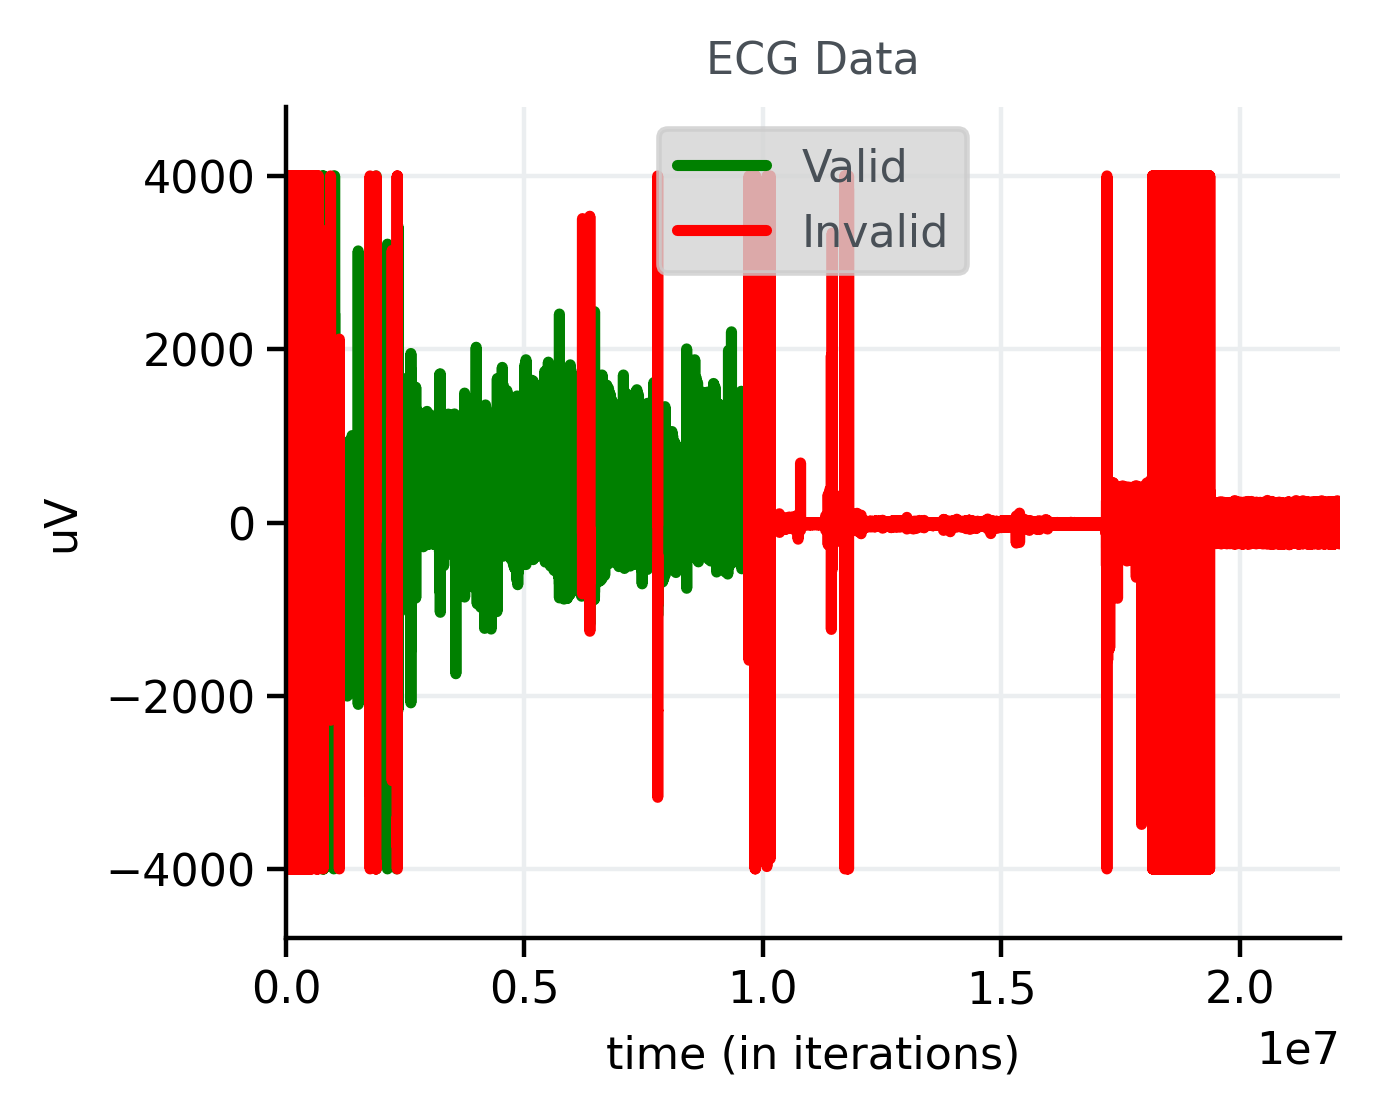

In [67]:
file_name = "Somnowatch_Messung.edf"

valid_regions_dict = main.load_from_pickle(VALID_ECG_REGIONS_PATH)
sigbufs, sigfreqs, duration = main.read_edf.get_edf_data(DATA_DIRECTORY + file_name)

valid_regions_ratio = main.check_data.valid_total_ratio(sigbufs, valid_regions_dict["Somnowatch_Messung.edf"], parameters["ecg_key"])
print("(Valid / Total) Regions Ratio: %f %%" % (round(valid_regions_ratio, 4)*100))

total_length = len(sigbufs[parameters["ecg_key"]])
x_lim = [int(0*total_length), int(1*total_length)]
main.plot_helper.plot_valid_regions(sigbufs[parameters["ecg_key"]], valid_regions_dict["Somnowatch_Messung.edf"], xlim = x_lim)

## Calculating R peaks

The calculated R peaks will be plotted in a random interval. Of course you can change the
interval size or even define the interval yourself. Go ahead and look at a few different intervals
for different files!

ATTENTION: Valid ECG Regions and R peaks must have been compiled first (see main.py - PREPARATION SECTION)

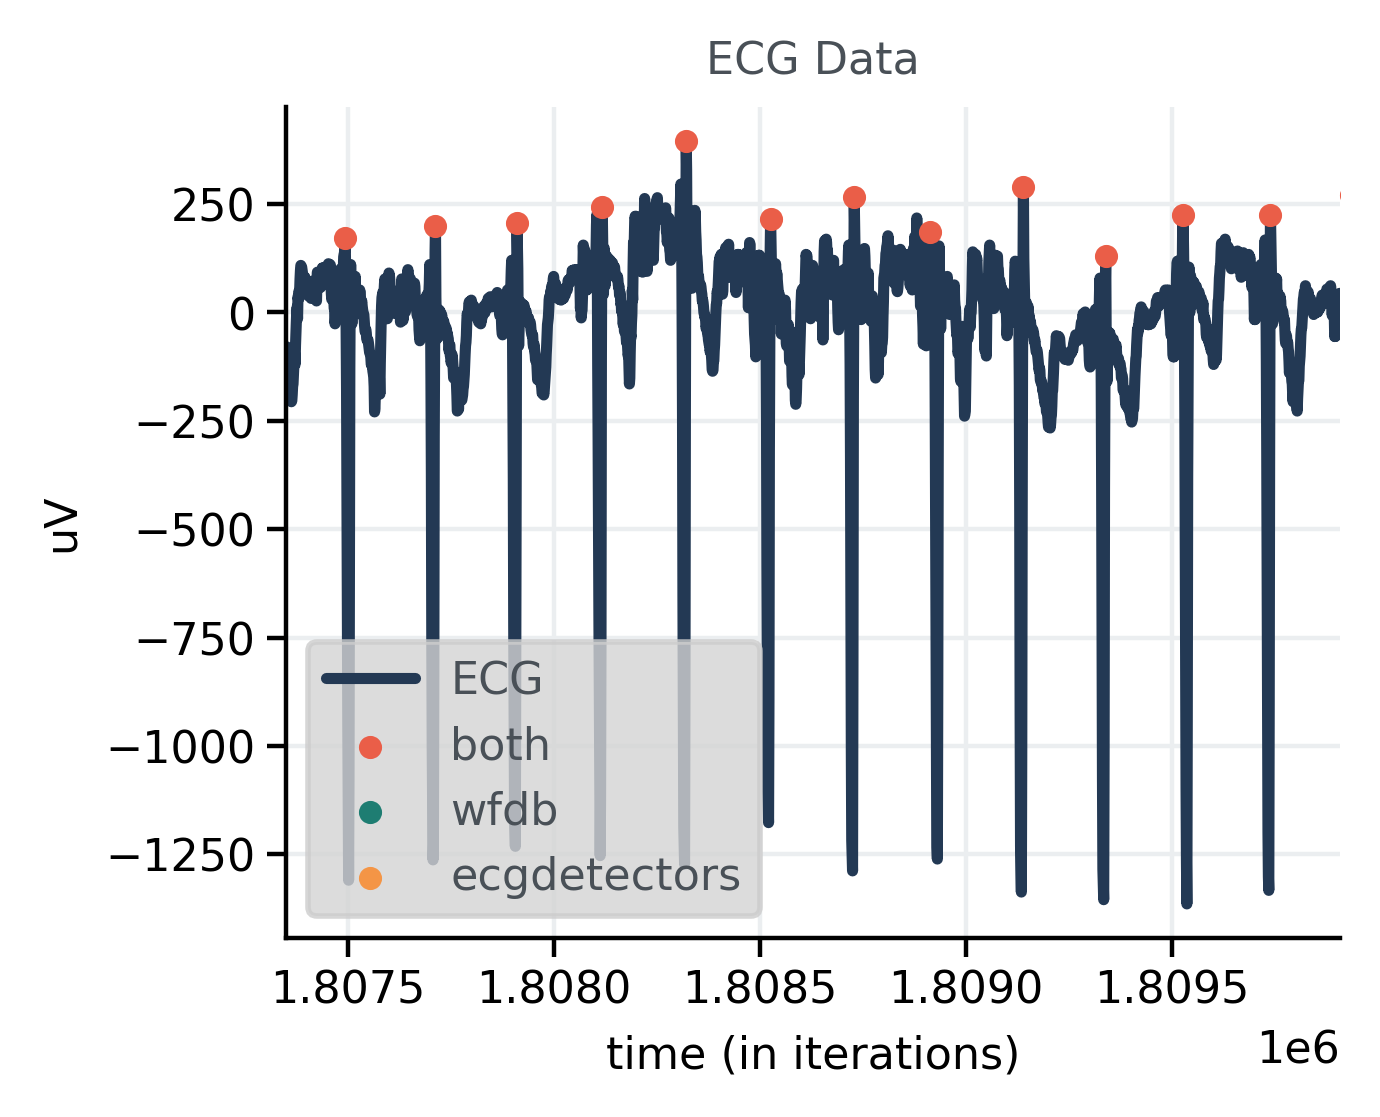

In [68]:
file_name = "Somnowatch_Messung.edf"
interval_size = 2560

# choose random valid interval
valid_regions_dict = main.load_from_pickle(VALID_ECG_REGIONS_PATH)
this_valid_regions = valid_regions_dict["Somnowatch_Messung.edf"]
random_valid_region = random.choice(this_valid_regions)
random_valid_region_start = random.randint(random_valid_region[0], random_valid_region[1] - interval_size)

# x_lim = [708000, 708500]
x_lim = [random_valid_region_start, random_valid_region_start + interval_size]

sigbufs, sigfreqs, duration = main.read_edf.get_edf_data(DATA_DIRECTORY + file_name)
certain_rpeaks = main.load_from_pickle(CERTAIN_RPEAKS_PATH)
uncertain_primary_rpeaks = main.load_from_pickle(UNCERTAIN_PRIMARY_RPEAKS_PATH)
uncertain_secondary_rpeaks = main.load_from_pickle(UNCERTAIN_SECONDARY_RPEAKS_PATH)
name_primary = parameters["rpeak_name_primary"]
name_secondary = parameters["rpeak_name_secondary"]

main.plot_helper.plot_rpeak_detection(
    sigbufs[parameters["ecg_key"]], 
    certain_rpeaks[file_name], 
    uncertain_primary_rpeaks[file_name], 
    uncertain_secondary_rpeaks[file_name],
    name_primary,
    name_secondary, 
    xlim = x_lim)